In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
#Load the train and validation sets
train_df=pd.read_csv("/content/drive/MyDrive/data/Artificial inteligence II/vaccine_train_set.csv",index_col=0)
val_df=pd.read_csv("/content/drive/MyDrive/data/Artificial inteligence II/vaccine_validation_set.csv",index_col=0)

In [4]:
#Checks that there aren't any null values
print(train_df.head())
print(train_df.shape)
print(train_df.isnull().sum())
#print the portion of each class for the train set
print(train_df.groupby("label").count())

                                               tweet  label
0  Sip N Shop Come thru right now #Marjais #Popul...      0
1  I don't know about you but My family and I wil...      1
2  @MSignorile Immunizations should be mandatory....      2
3  President Obama spoke in favor of vaccination ...      0
4  "@myfoxla: Arizona monitoring hundreds for mea...      0
(15976, 2)
tweet    0
label    0
dtype: int64
       tweet
label       
0       7458
1       2073
2       6445


In [5]:
#Checks that there aren't any null values
print(val_df.head())
print(val_df.shape)
print(val_df.isnull().sum())
#print the portion of each class for the validation set
print(val_df.groupby("label").count())

                                               tweet  label
0  @user They had a massive surge in with covid d...      1
1  Required vaccines for school: Parents and guar...      0
2  “@KCStar: Two more Johnson County children hav...      0
3  NV can do better. Which states are the best (a...      2
4  Nothing like killing ourselves w/ our own fear...      2
(2282, 2)
tweet    0
label    0
dtype: int64
       tweet
label       
0       1065
1        296
2        921


In [6]:
import numpy as np
#open the pretrained embendings
Glove_file=open('/content/drive/MyDrive/data/Artificial inteligence II/glove.twitter.27B.200d.txt',encoding="utf8")
glove_vectors=dict()

#load the pretrain embedings to use them
for line in Glove_file:

    values=line.split()
    word=values[0]
    vectors=np.asarray(values[1:]).astype(np.float64)
    glove_vectors[word]=vectors

Glove_file.close()
#save them into a dictionary with form=> word(key): vector_with_shape(200,1) (value)
print(len(glove_vectors.keys()))

1193514


In [7]:
#Example: Print an embending of the word "woah"
print(glove_vectors["woah"])

[ 0.35049   -0.092346  -0.21949   -0.082786  -0.33759   -0.313
  0.75483   -0.045466  -0.16005    0.1852     0.049366   0.16048
  0.078113  -0.16777   -0.017527   0.32436    0.55093    0.18986
  0.17321   -0.26016    0.2022     0.20981    0.27178   -0.21254
 -0.21969    1.1221    -0.38136   -0.2081     0.18409   -0.47501
  0.27519   -0.051902  -0.034876  -0.31578   -0.29349    0.28474
 -0.077157  -0.42709   -0.050599  -0.51074    0.34047   -0.057103
 -0.087408   0.027009  -0.26078   -0.10273    1.1167     0.39918
 -0.55439    1.0249    -0.1998    -0.26164   -0.43768   -0.49712
  0.25035    0.12851    0.2093    -0.42327   -0.36178   -0.22508
  0.15384    0.28213    0.0079844 -0.2828    -0.23619    0.41811
 -0.11467    0.55878    0.10266    0.01856    0.31456    0.57663
 -0.00869    0.12738   -0.34583    0.2507     0.49821    0.20216
 -0.12245    0.19284    0.077367   0.078366  -0.45167    0.010687
  0.31628   -0.58084   -0.29625   -0.31293   -0.087788  -0.11117
  0.3828     0.056562  -0

In [8]:
#function to remove the emojis fron a string
#This will be used for the cleance of the tweets
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [9]:
# Prepare stopword list
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords as sw

#cleance the tweets and tokenize them
def cleance_tokenizer(my_df):
    custom_stopwords=sw.words('english')
    #Cleaning
    #The 2 lines below is the code where I remove the links, the stopwords, and the punctuations from train set
    #remove links
    my_df["Filtered_words"]=my_df["tweet"].apply(lambda row:re.sub(r'http\S+', '', row))
    #custom punctuation
    my_punct=string.punctuation.replace("'","")
    #remove punctuation and make all the leters lowercase
    my_df["Filtered_words"]=my_df['Filtered_words'].apply(lambda x: ' '.join([word.translate(str.maketrans('', '', string.punctuation)).lower() for word in word_tokenize(x) if word not in (custom_stopwords)]))
    #remove digits
    my_df["Filtered_words"]=my_df["Filtered_words"].apply(lambda x: re.sub(r'\d+', '', x))
    #remove emojis
    my_df["Filtered_words"]=my_df["Filtered_words"].apply(lambda x:deEmojify(x))
    #tokenize the filtered words
    my_df['token_words']=my_df['Filtered_words'].apply(lambda x: TreebankWordTokenizer().tokenize(x))
    my_df.head()

cleance_tokenizer(train_df)
# print(train_df.head())
cleance_tokenizer(val_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
print("Average words of the tweets:")
print(train_df['token_words'].str.len().mean())

print("Max words of the tweets:")
print(train_df['token_words'].str.len().max())

Average words of the tweets:
12.519591887831748
Max words of the tweets:
76


In [11]:
import numpy as np

# the function that will take the previous tokenized words and take the mean of the pre-trained embending of the words that consists the tweet
def tweets_to_sequence(tweets_set,dim,max_size):
    #tweets_set=tweets_set.apply(lambda x: TreebankWordTokenizer().tokenize(x))
    tweets_vectors=np.zeros((tweets_set.shape[0],max_size,dim))
    #the total words on tweets that does not have an embending match
    count=0
    #the total words on tweets that have an embending match
    count_found=0
    #a set that keeps all the words that were matched with an already word that has a pretrained embending
    found_set=set()
    #set that keeps track of all the words which does not have a pretrained embending
    nt_found_set=set()
    for index, row in tweets_set.iteritems():
        #print(index,row)
        #words= TreebankWordTokenizer().tokenize(row)
        word_vectors=np.zeros((max_size,dim))
        for i,w in enumerate(row):
            if i>=max_size:
                break
            vector=glove_vectors.get(w)
            if vector is not None:
                count_found+=1
                word_vectors[i]=(np.array(vector))
                found_set.add(w)
            else:
                count+=1
                word_vectors[i]=(np.zeros(dim))
                #print(w)
                nt_found_set.add(w)

        #print(np.array(word_vectors))    
        sentence_vecs= np.array(word_vectors).reshape((max_size,dim))
        #print(np.array(word_vectors).shape)  
        tweets_vectors[index]=sentence_vecs              #tweets_vectors.append([np.mean(k) for k in zip(*word_vectors)])
    #print the total words to the words that there wasn't any embending    
    print(count_found, count)
    print(len(found_set), len(nt_found_set)) 
    print(tweets_vectors.shape)
    return  tweets_vectors  


#for each tweet create a 20sized vector in train set
train_tweets_embendings=tweets_to_sequence(train_df['token_words'],200,20)
#for each tweet create a 20sized vector in validation set
val_tweets_embendings=tweets_to_sequence(val_df['token_words'],200,20)

176309 16753
15244 9336
(15976, 20, 200)
25196 2328
5526 1646
(2282, 20, 200)


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

tr_tweets_emb=np.array(train_tweets_embendings)
vl_tweets_emb=np.array(val_tweets_embendings)
print(tr_tweets_emb.shape)
print(vl_tweets_emb.shape)
print(tr_tweets_emb.dtype)
y_df = pd.DataFrame(train_df, columns=['label'])
#x-create the tensor for the train_tweets_embendings
x = torch.tensor(tr_tweets_emb, dtype=torch.float)
#y-create the tensor for the labels of the train set
y = torch.tensor(y_df.values, dtype=torch.float)

#val_x-create the tensor for the validation_tweets_embendings
val_x=torch.tensor(vl_tweets_emb, dtype=torch.float)
#y-create the tensor for the labels of the validation set
val_y_df = pd.DataFrame(val_df, columns=['label'])
val_y = torch.tensor(val_y_df.values, dtype=torch.float)

# print(y[1])
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

(15976, 20, 200)
(2282, 20, 200)
float64
x shape: torch.Size([15976, 20, 200])
y shape: torch.Size([15976, 1])


In [13]:
#Used the source below to implement my own Attention class
#https://pytorchnlp.readthedocs.io/en/latest/_modules/torchnlp/nn/attention.html
#https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/

class Attention(nn.Module):
    def __init__(self, dimensions):
        self.dimension=dimensions
        super(Attention, self).__init__()
        self.linear_in = nn.Linear(dimensions, dimensions)
        self.linear_out = nn.Linear(dimensions * 2, dimensions)
        self.softmax = nn.Softmax(dim=1)
        self.tanh = nn.Tanh()

    def forward(self, query, context):
        batch_size, output_len, dimensions = query.size()
        query_len = context.size(1)

        #Linear pass the input
        query = self.linear_in(query)


        # (batch_size, output_len, dimensions) * (batch_size, query_len, dimensions) ->
        # (batch_size, output_len, query_len)

        #calculate the scores between the final hidden state and all the previous ones as dot products
        attention_scores = torch.bmm(query, context.unsqueeze(2))

        attention_scores=attention_scores.squeeze()

        # Compute weights across every context sequence. See which word was taken into consideration more
        #use softmax layer to produce the probabilities of each "word"
        attention_weights = self.softmax(attention_scores)

        # (batch_size, output_len, query_len) * (batch_size, query_len, dimensions) ->
        # (batch_size, output_len, dimensions)

        mix = torch.bmm( attention_weights.unsqueeze(1) ,query).squeeze()

        #Combine the weighted results with the final hidden state.
        combined = torch.cat((mix, context), dim=1)


        # Apply linear_out on every 2nd dimension of concat
        # output -> (batch_size, output_len, dimensions)
        output = self.linear_out(combined)
        output = self.tanh(output)

        return output, attention_weights


In [14]:
#My Neural Network model, with 3 layers 128-64-32 and activation function ReLU6
class RNN(nn.Module):
    
    def __init__(self, D_in, hidden_s, D_out, cell_t, stacked_n, layers_n, sk_layers, dr_out, bidir, b_s, att):
        activation_f=nn.ReLU        #the activation function
        self.d_in=D_in
        self.hidden_size=hidden_s
        self.d_out=D_out
        self.cell_t=cell_t
        self.stacked_layers_num=stacked_n
        self.layers_num=layers_n
        self.skip_layers=sk_layers
        self.drop_out=dr_out
        self.bidirectional=bidir
        self.batch_size=b_s
        self.attention=att
        # self.downsample=downsample
        super(RNN, self).__init__()

        if self.bidirectional:
            self.lin= nn.Linear(self.hidden_size*2, D_out)
        else:
            self.lin= nn.Linear(self.hidden_size, D_out)   


        self.rnns = nn.ModuleList()         # using a module list to implement the stacked layers

        #choose the format that the layers of our model will have
        if cell_t=="GRU":
            self.component_type=nn.GRU
        else:
            self.component_type=nn.LSTM

        #create a list that will have stacked_layers_num as 
        for l in range(self.stacked_layers_num):
            if l>0:
                if self.bidirectional:
                    layer_input=self.hidden_size*2
                else:    
                    layer_input=self.hidden_size
            else:
                layer_input=self.d_in
            self.rnns.append(self.component_type(input_size=layer_input, 
                            hidden_size=self.hidden_size, 
                            num_layers=self.layers_num,           #we stack the lstm manually for skip connections
                            batch_first=True, 
                            bidirectional=self.bidirectional, 
                            dropout=self.drop_out))

        #the layer used to be skipped
        self.sk_layer=nn.ReLU()
        
        #The attention layer
        self.attention_layer=Attention(self.d_in)
        #The dropout layers need to have betwwen stacked layers
        self.dropout_layer = torch.nn.Dropout(p=self.drop_out)

    def forward(self, x):       

        if self.bidirectional:
            #Initialize the hidden states for LSTM and GRU if it is bidirectional x2
            h0 = torch.zeros(self.layers_num*2, x.size(0), self.hidden_size) 
            #Initialize the cell states for LSTM if it is bidirectional x2
            c0 = torch.zeros(self.layers_num*2, x.size(0), self.hidden_size)
        else:
            #Initialize the hidden states for LSTM and GRU
            h0 = torch.zeros(self.layers_num, x.size(0), self.hidden_size) 
            #Initialize the cell states for LSTM
            c0 = torch.zeros(self.layers_num, x.size(0), self.hidden_size)

 
        for r,rnn in enumerate(self.rnns):
            #Run either the GRUs or LSTMs Layers
            if self.cell_t=="LSTM":
                out, out_states = rnn(x,(h0, c0))
            else:
                out, out_states = rnn(x,h0) 

            # SKIP LAYER
            if self.skip_layers and r>0:
                out = self.sk_layer(out) + x
            #give as input to the next LSTM the output of the current LSTM
            out = self.dropout_layer(out)
            x=out
         
        #Keep the results only from the last item of the sequence
        last_out = out[:,-1,:]
        if self.attention:
            last_out, attention_weights = self.attention_layer.forward(out, last_out)
        # print(last_out.shape)
        out = self.lin(last_out)
        return out #torch.relu(out)

In [15]:
from sklearn.utils import class_weight
#Define layer sizes
D_in =  200 #dimensions of each input embedding
hidden_num = 100
#Out put dimensions 3 (one for each class)
D_out = 3
#Dropout Layer Propbability
dr_out=0.3
#If the RNN will be bidirectional  or not
bidirectional=True
#numbers of stacked layers for each LSTM/GRU
layers_num=2
#Batch size
batch_size=64

#Define Hyperparameters
learning_rate = 0.0003 #0.00001

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

#initialize the class weights in a balanced way
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_df.label), y=train_df.label)
class_weights = torch.tensor(class_weights,dtype=torch.float)

#Initialize model, loss, optimizer
#D_in, hidden_s, D_out, cell_t, stacked_n, layers_n, sk_layers, dr_out, bidir, b_s
model = RNN(D_in=D_in,
            hidden_s=hidden_num, 
            D_out=D_out,
            cell_t="LSTM",
            stacked_n=2,
            layers_n=layers_num,
            sk_layers=True, 
            dr_out=dr_out, 
            bidir=True, 
            b_s=batch_size,
            att=True).to(device)  #my RNN


loss_func = nn.CrossEntropyLoss()   #Loss Function  weight=class_weights
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 1e-3)  #Adamax optimizer

#Initialize dataloader
train_dataset = torch.utils.data.TensorDataset(x, y)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64,shuffle=True) #shuffle=True
#validation data loaders
val_dataset = torch.utils.data.TensorDataset(val_x, val_y)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64,shuffle=True) #shuffle=True



Using cpu device


In [16]:
#a function to calculate the accuracy given the predictions of each class and the truly label
def multiclass_accuracy(predictions, targets):
    y_pred_softmax = torch.log_softmax(predictions, dim = 1)
    #the label that the tweet belongs to will be the one with the highest propability
    predicts=torch.argmax(y_pred_softmax,1)
    corrects_found=(torch.squeeze(targets) == predicts).float()
    return corrects_found.sum()/len(corrects_found)

In [17]:
#Training Session
EPOCHS_NUM=8
epochs=[]
losses=[]
accuracies=[]
val_losses=[]
val_accuracies=[]
for epoch in range(EPOCHS_NUM):
    batch_losses = []
    batch_accuracies = []
    epochs.append(epoch)
    epoch_acc=0
    for x_batch, y_batch in train_dataloader:
        x_batch=x_batch.type(torch.FloatTensor).to(device=device)
        y_batch=y_batch.to(device=device)

        #print(x_batch.long())
        y_pred = model(x_batch)
        loss = loss_func(y_pred, y_batch.squeeze(1).long())     
        batch_losses.append(loss.item())
        #Delete previously stored gradients
        optimizer.zero_grad()
        #Perform backpropagation starting from the loss calculated in this epoch
        loss.backward()
        #gradient clipping do not exceed 20
        torch.nn.utils.clip_grad_value_(model.parameters(), 20)
        #Update model's weights based on the gradients calculated during backprop
        optimizer.step()
        
        #take the index of the max among the 3 options
        #calculate the accuracy
        batch_acc=multiclass_accuracy(y_pred,y_batch)
        batch_accuracies.append(batch_acc)

    # VALIDATION    
    with torch.no_grad():
        
        val_batch_losses = []
        val_batch_accuracies = []
        
        model.eval()
        for X_val_batch, y_val_batch in val_dataloader:
            X_val_batch=X_val_batch.to(device=device)
            y_val_batch=y_val_batch.to(device=device)
            #make the predictions based on the current trained model
            y_val_pred = model(X_val_batch)
            #calculate the loss function
            val_loss = loss_func(y_val_pred.squeeze(1), y_val_batch.squeeze(1).long())
            val_batch_losses.append(val_loss)
            #calculate the accuracy
            val_acc = multiclass_accuracy(y_val_pred, y_val_batch)
            val_batch_accuracies.append(val_acc)



    loss=sum(batch_losses)/len(train_dataloader)
    print(f"Epoch {epoch:3}: Loss = {loss:.5f}")
    acc=sum(batch_accuracies)/len(train_dataloader)
    print(f"Accuracy = {acc:.5f}")
    losses.append(loss)
    accuracies.append(acc)
    #validation scores
    val_loss=sum(val_batch_losses)/len(val_dataloader)
    print(f"VAL_Loss = {val_loss:.5f}")
    val_acc=sum(val_batch_accuracies)/len(val_dataloader)
    print(f"VAL_Accuracy = {val_acc:.5f}")
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

Epoch   0: Loss = 0.85899
Accuracy = 0.59866
VAL_Loss = 0.77240
VAL_Accuracy = 0.65722
Epoch   1: Loss = 0.73885
Accuracy = 0.67513
VAL_Loss = 0.74847
VAL_Accuracy = 0.66609
Epoch   2: Loss = 0.70887
Accuracy = 0.69235
VAL_Loss = 0.73207
VAL_Accuracy = 0.67890
Epoch   3: Loss = 0.68873
Accuracy = 0.69974
VAL_Loss = 0.70329
VAL_Accuracy = 0.68888
Epoch   4: Loss = 0.67547
Accuracy = 0.70566
VAL_Loss = 0.70284
VAL_Accuracy = 0.68868
Epoch   5: Loss = 0.66950
Accuracy = 0.70955
VAL_Loss = 0.69260
VAL_Accuracy = 0.69409
Epoch   6: Loss = 0.65762
Accuracy = 0.71737
VAL_Loss = 0.71115
VAL_Accuracy = 0.68909
Epoch   7: Loss = 0.65217
Accuracy = 0.71865
VAL_Loss = 0.69808
VAL_Accuracy = 0.69170


tensor(0.7187)
tensor(0.6941)


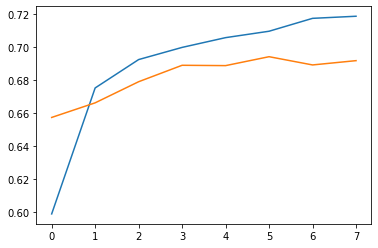

In [18]:
import matplotlib.pyplot as plt
#plot the accuracy arcoding to the epochs
plt.plot(epochs,accuracies)
plt.plot(epochs,val_accuracies)
print(max(accuracies))
print(max(val_accuracies))

0.6521735441684723
tensor(0.6926)


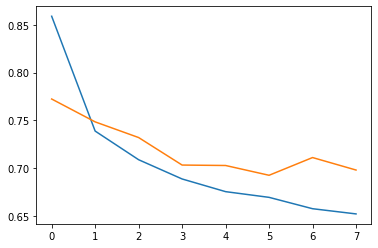

In [19]:
import matplotlib.pyplot as plt
#plot the error acording to the epochs
plt.plot(epochs,losses)
plt.plot(epochs,val_losses)
print(min(losses))
print(min(val_losses))

In [20]:
#make predictions for the validation set
with torch.no_grad():
    val_pred=model(val_x)
    soft_val_pred=torch.softmax(val_pred, dim = 1)
    print(val_pred)
    print(multiclass_accuracy(val_pred,val_y))

tensor([[ 0.4708, -0.1339, -0.2645],
        [ 0.5324, -1.3774,  0.7415],
        [ 1.6309, -2.3163,  0.5407],
        ...,
        [-0.1272, -0.8414,  0.8825],
        [ 0.2487, -1.1977,  0.8450],
        [ 1.0118, -2.1243,  0.9310]])
tensor(0.6919)


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#a function to calculate the scores given the predictions of each class and the truly label
def multiclass_scores(predictions, targets):
    y_pred_softmax = torch.log_softmax(predictions, dim = 1)
    #the label that the tweet belongs to will be the one with the highest propability
    predicts=torch.argmax(y_pred_softmax,1)
    print(classification_report(torch.squeeze(targets), predicts))
    print("Accuracy: "+ str(accuracy_score(torch.squeeze(targets),predicts)))
    print("F1_score: "+str(f1_score(torch.squeeze(targets),predicts,average='macro')))
    print("Precision: "+str(precision_score(torch.squeeze(targets),predicts,average='macro')))
    print("Recall: "+str(recall_score(torch.squeeze(targets),predicts,average='macro')))


multiclass_scores(val_pred,val_y)    

              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77      1065
         1.0       0.56      0.21      0.31       296
         2.0       0.66      0.70      0.68       921

    accuracy                           0.69      2282
   macro avg       0.65      0.58      0.59      2282
weighted avg       0.68      0.69      0.67      2282

Accuracy: 0.6919368974583698
F1_score: 0.5868325137680116
Precision: 0.6510096061170726
Recall: 0.5771970610331394


In [22]:
#ROC Curve calculations
from sklearn.metrics import roc_curve, auc
#acc, val_final_predicts=multiclass_accuracy_predictions(val_pred,val_y)
fpr = dict()
tpr = dict()
roc_auc = dict()

num_val_y=val_y.squeeze().numpy().astype(int)
#print(num_val_y.shape)
#making the label of validation set one-hot encoding
b_num_val_y = np.zeros((num_val_y.size, num_val_y.max()+1))
b_num_val_y[np.arange(num_val_y.size),num_val_y] = 1

for i in range(3):
    
    fpr[i], tpr[i], _ = roc_curve(b_num_val_y[:,i], soft_val_pred[:,i])
    #print(fpr[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

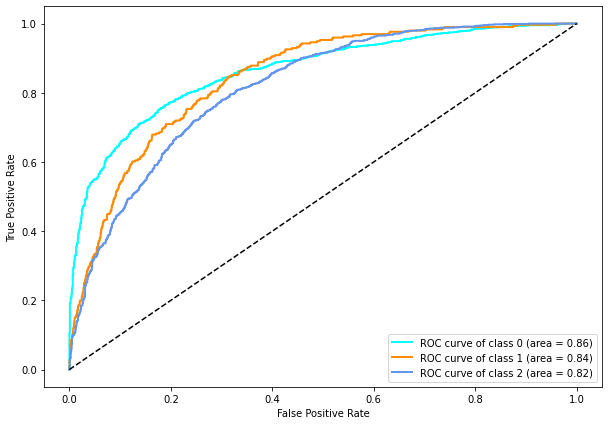

In [23]:
from itertools import cycle
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
plt.figure(figsize = (10,7))
for i, color in zip(range(3), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i])
    )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()    

[[867  17 181]
 [ 78  63 155]
 [240  32 649]]


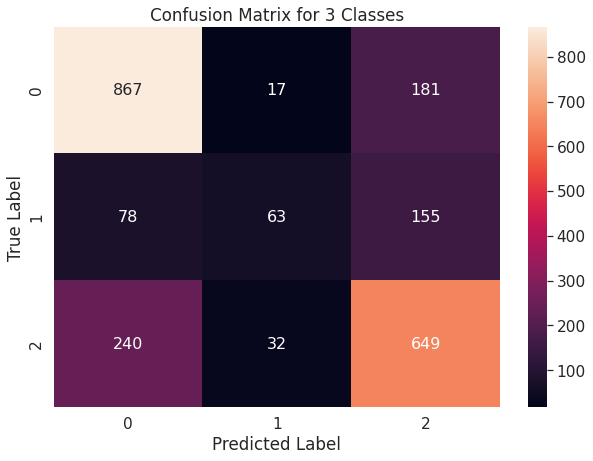

In [24]:
#The confusion matrix of my predictions
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

val_max=torch.argmax(soft_val_pred, dim=1)
cm=confusion_matrix( y_true=val_y.squeeze(1), y_pred=val_max,labels=[0,1,2])
print(cm)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix for 3 Classes")
plt.show()